In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier, Lasso
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC

from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle


In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [4]:
mrna_df =pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/capstone2.mrn_df2.csv')
df = pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/METABRIC_RNA_Mutation.csv')


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df.replace(death_from_dict, inplace =True)
mrna_df['death_from_cancer'] = df.death_from_cancer



In [6]:
mrna_df.death_from_cancer.fillna(0, inplace = True)

In [7]:
# mrna_df = np.random.shuffle(mrna_df.values)
mrna_df = shuffle(mrna_df)

In [8]:
mrna_df 

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,death_from_cancer
1790,1.5168,-1.8925,-0.7698,1.5281,2.2336,-0.0505,0.4120,0.2913,-1.7848,1.6076,...,-0.9631,-0.9436,2.1672,0.3065,0.5586,2.5915,-0.4279,1.5318,-0.8474,1.0
1757,-0.0134,0.6644,-0.5336,0.5190,0.1878,-1.3654,-0.0335,-1.0429,0.8029,1.0549,...,-0.3211,0.6138,-0.8163,-0.3615,1.0446,1.3453,-0.3457,0.9159,-0.0023,0.0
51,-0.0616,0.1084,-0.6249,0.2310,0.0583,-0.1163,1.4386,-0.1129,1.4486,-0.6146,...,0.1824,-0.6832,2.3282,-0.1932,0.7465,1.5975,-0.3323,-0.2872,-0.7392,0.0
1624,-0.4585,1.0126,1.8303,-1.1746,-0.6703,-0.5445,-0.4007,2.2545,-1.2164,0.8849,...,-0.3841,-0.8886,-0.4274,0.5903,0.4222,0.0320,-0.4499,0.7484,-0.7613,0.0
390,0.4022,-1.5537,-0.7546,-0.0122,-0.9086,0.0591,0.5064,-0.3064,-1.0644,-0.5811,...,-0.9064,-0.2301,-0.0833,1.6343,-0.8361,0.0169,0.2106,0.0843,0.5731,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,-0.7409,-0.5378,-1.1054,0.3454,0.5465,-0.5482,0.6663,-0.8061,1.1580,-1.2843,...,-0.7180,0.4448,-0.7685,0.6235,-1.0950,-1.3931,0.1116,0.4005,2.2408,0.0
979,-1.1791,0.2061,-0.6906,1.1909,-0.6028,0.0193,-0.7066,-0.8460,0.8521,1.1152,...,-0.2359,-0.5447,1.2397,-0.6940,-0.0944,0.1742,-0.4224,-0.3538,-0.6395,0.0
902,0.6199,1.5865,1.4499,1.0206,-0.0843,-1.4706,0.1384,-0.7174,-0.6664,0.2897,...,-0.8604,0.1061,-0.4794,0.4129,0.8962,0.1676,-0.6055,0.5475,-0.7016,0.0
564,0.4670,1.9303,-0.0923,2.0163,-1.0900,-0.9410,-0.3857,-2.6887,-1.4730,-1.1766,...,0.3657,-0.9468,-0.5793,-0.4237,0.2870,-1.2957,-0.5544,-1.0656,-0.6982,0.0


In [9]:
# Validation_set = mrna_df[:200]
# mrna1 = mrna_df[200:]

In [17]:
len(Validation_set)
len(mrna1)

200

In [15]:
# Validation_set.to_csv(r'../data/validation_set.csv', index = False)
len

In [19]:

y = mrna1.pop('death_from_cancer')
X = mrna1

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify = y)
# X_train2, X_test, y_train2, y_test = train_test_split(X_train.copy(), y_train.copy(), test_size=0.10, random_state=1)

In [40]:
gradient_boosting_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
                         ,'max_depth': [2, 4, 8]
                         ,'subsample': [0.25, 0.5, 0.75, 1.0]
                         ,'min_samples_leaf': [1, 2, 4]
                         ,'max_features': ['sqrt', 'log2', None]
                         ,'n_estimators': [5,10,25,50,100,200]}

random_forest_grid = {'max_depth': [2, 4, 8]
                     ,'max_features': ['sqrt', 'log2', None]
                     ,'min_samples_leaf': [1, 2, 4]
                     ,'min_samples_split': [2, 4]
                     ,'bootstrap': [True, False]
                     ,'class_weight': ['balanced']

                     ,'n_estimators': [5,10,25,50,100,200]}

logistic_regression_grid = {'Cs':[2,5,10, 25, 100, 200]
                       ,'cv':[4]
                       ,'solver':['liblinear']#'lbfgs',
                       ,'max_iter' : [50]
                       ,'class_weight':['balanced']
                       ,'penalty':['l1'] #, 'l2', 'elasticnet'
                           }
    
svm_grid = {'C':[0.5, 1, 2]

                       ,'kernel':['rbf', 'liblinear']}

ada_grid = {'base_estimator': [DecisionTreeClassifier(class_weight='balanced')], \
                  'n_estimators': [100, 250], \
                  'learning_rate': [0.1, 0.25]}


sgd_grid = {'loss': ['hinge', 'log', 'modified_huber'], \
                      'alpha': [0.001, 0.01], \
                      'penalty': ['l1'], \
                      'max_iter': [5, 10, 25], \
                      'class_weight': ['balanced']}



In [41]:


logistic_randomsearch = RandomizedSearchCV(LogisticRegressionCV()
                                              ,logistic_regression_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

svm_randomsearch = RandomizedSearchCV(SVC(gamma = 'auto')
                                              ,svm_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

gradient_randomsearch = RandomizedSearchCV(GradientBoostingClassifier()
                                          ,gradient_boosting_grid
                                          ,n_jobs=-1
                                          ,verbose=False
                                          ,scoring='roc_auc')

random_foreset_randomsearch = RandomizedSearchCV(RandomForestClassifier()
                                                ,random_forest_grid
                                                ,n_jobs=-1
                                                ,verbose=False
                                                ,scoring='roc_auc')

ada_randomsearch = RandomizedSearchCV(AdaBoostClassifier()
                                                ,ada_grid
                                                ,n_jobs=-1
                                                ,verbose=False
                                                ,scoring='roc_auc')

SGD_randomsearch = RandomizedSearchCV(SGDClassifier()
                                                ,sgd_grid
                                                ,n_jobs=-1
                                                ,verbose=False
                                                ,scoring='roc_auc')





In [42]:
logistic_randomsearch.fit(X_train, y_train)
print(f"Best logistic Parameters: {logistic_randomsearch.best_params_}")
print(f"Best logistic Model: {logistic_randomsearch.best_estimator_}")
print(f"Best logistic Score: {logistic_randomsearch.best_score_:.4f}")

svm_randomsearch.fit(X_train, y_train)
print(f"Best svm Parameters: {svm_randomsearch.best_params_}")
print(f"Best svm Model: {svm_randomsearch.best_estimator_}")
print(f"Best svm Score: {svm_randomsearch.best_score_:.4f}")

gradient_randomsearch.fit(X_train, y_train)
print(f"Best Gradient Parameters: {gradient_randomsearch.best_params_}")
print(f"Best Gradient Model: {gradient_randomsearch.best_estimator_}")
print(f"Best Gradient Score: {gradient_randomsearch.best_score_:.4f}")

random_foreset_randomsearch.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {random_foreset_randomsearch.best_params_}")
print(f"Best Random Forest Model: {random_foreset_randomsearch.best_estimator_}")
print(f"Best Random Forest Score: {random_foreset_randomsearch.best_score_:.4f}")


ada_randomsearch.fit(X_train, y_train)
print(f"Best Random adaboost Parameters: {ada_randomsearch.best_params_}")
print(f"Best Random adaboost Model: {ada_randomsearch.best_estimator_}")
print(f"Best Random adaboost Score: {ada_randomsearch.best_score_:.4f}")

SGD_randomsearch.fit(X_train, y_train)
print(f"Best Random SGD Parameters: {SGD_randomsearch.best_params_}")
print(f"Best Random SGD Model: {SGD_randomsearch.best_estimator_}")
print(f"Best Random SGD Score: {SGD_randomsearch.best_score_:.4f}")




/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best logistic Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 50, 'cv': 4, 'class_weight': 'balanced', 'Cs': 2}
Best logistic Model: LogisticRegressionCV(Cs=2, class_weight='balanced', cv=4, max_iter=50,
                     penalty='l1', solver='liblinear')
Best logistic Score: 0.5000


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best svm Parameters: {'kernel': 'rbf', 'C': 1}
Best svm Model: SVC(C=1, gamma='auto')
Best svm Score: 0.6527
Best Gradient Parameters: {'subsample': 0.75, 'n_estimators': 100, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.1}
Best Gradient Model: GradientBoostingClassifier(max_depth=4, max_features='sqrt', subsample=0.75)
Best Gradient Score: 0.6560
Best Random Forest Parameters: {'n_estimators': 25, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 4, 'class_weight': 'balanced', 'bootstrap': True}
Best Random Forest Model: RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=None,
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=25)
Best Random Forest Score: 0.6675


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Random adaboost Parameters: {'n_estimators': 250, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(class_weight='balanced')}
Best Random adaboost Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                   learning_rate=0.1, n_estimators=250)
Best Random adaboost Score: 0.5235
Best Random SGD Parameters: {'penalty': 'l1', 'max_iter': 25, 'loss': 'modified_huber', 'class_weight': 'balanced', 'alpha': 0.001}
Best Random SGD Model: SGDClassifier(alpha=0.001, class_weight='balanced', loss='modified_huber',
              max_iter=25, penalty='l1')
Best Random SGD Score: 0.5861


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [43]:
logistic_best_model = logistic_randomsearch.best_estimator_
logistic_y_hats = logistic_best_model.predict(X_test)
print(f"Gradient ROC Score = {roc_auc_score(y_test, logistic_y_hats):.4f}")

svm_best_model = svm_randomsearch.best_estimator_
svm_y_hats = svm_best_model.predict(X_test)
print(f"SVM ROC Score = {roc_auc_score(y_test, svm_y_hats):.4f}")

gradient_best_model = gradient_randomsearch.best_estimator_
gy_hats = gradient_best_model.predict(X_test)
print(f"Gradient ROC Score = {roc_auc_score(y_test, gy_hats):.4f}")

random_forest_best_model = random_foreset_randomsearch.best_estimator_
ry_hats = random_forest_best_model.predict(X_test)
print(f"Random Forest ROC Score = {roc_auc_score(y_test, ry_hats):.4f}")




ada_boost_best_model = ada_randomsearch.best_estimator_
ada_y_hats = ada_boost_best_model.predict(X_test)
print(f"Random Adaboost ROC Score = {roc_auc_score(y_test, ada_y_hats):.4f}")

SGD_best_model = SGD_randomsearch.best_estimator_
SGD_y_hats = SGD_best_model.predict(X_test)
print(f"Random SGD ROC Score = {roc_auc_score(y_test, SGD_y_hats):.4f}")



Gradient ROC Score = 0.5000
SVM ROC Score = 0.5126
Gradient ROC Score = 0.5341
Random Forest ROC Score = 0.6412
Random Adaboost ROC Score = 0.5220
Random SGD ROC Score = 0.5141


In [44]:
# lst =X_train.shape,X_train2.shape, X_test.shape, X_val.shape
# print(lst)

In [45]:
print(classification_report(y_test, logistic_y_hats))

print(classification_report(y_test, svm_y_hats))
print(classification_report(y_test, gy_hats))
print(classification_report(y_test, ry_hats))
print(classification_report(y_test, ada_y_hats))
print(classification_report(y_test, SGD_y_hats))


              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       172
         1.0       0.00      0.00      0.00        84

    accuracy                           0.67       256
   macro avg       0.34      0.50      0.40       256
weighted avg       0.45      0.67      0.54       256

              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79       172
         1.0       0.41      0.08      0.14        84

    accuracy                           0.66       256
   macro avg       0.54      0.51      0.46       256
weighted avg       0.59      0.66      0.58       256

              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78       172
         1.0       0.44      0.18      0.25        84

    accuracy                           0.66       256
   macro avg       0.57      0.53      0.52       256
weighted avg       0.61      0.66      0.61       256

              preci

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
print(accuracy_score(y_test, logistic_y_hats))

print(accuracy_score(y_test, svm_y_hats))
print(accuracy_score(y_test, gy_hats))
print(accuracy_score(y_test, ry_hats))
print(accuracy_score(y_test, ada_y_hats))
print(accuracy_score(y_test, SGD_y_hats))

0.671875
0.66015625
0.65625
0.640625
0.56640625
0.53125


# Plotting ROC Curve

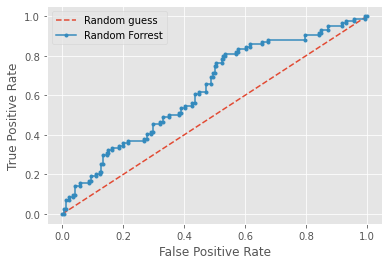

In [53]:

random_forest_best_model.fit(X_train, y_train)
# predict probabilities
yhat = random_forest_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='Random guess')
plt.plot(fpr, tpr, marker='.', label='Random Forrest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.savefig("Random_Forrest_ROC_curve.png", dpi=200)
plt.show()



from sklearn import metrics
# preds =logistic_best_model.predict_proba(X_test)
# tpr, tpr, thresholds = metrics.roc_curve(y_test,preds[:,1])
# print (thresholds)

# accuracy_ls = []
# for thres in thresholds:
#     y_pred = np.where(preds[:,1]>thres,1,0)
#     # Apply desired utility function to y_preds, for example accuracy.
#     accuracy_ls.append(metrics.recall_score(y_test, y_pred))
# accuracy_ls

In [ ]:
# validate_lg_y_hat = logistic_best_model.predict(X_val)
# validate_svm_y_hat = svm_best_model.predict(X_val)
# validate_gb_y_hat = gradient_best_model.predict(X_val)
# validate_rf_y_hat = random_forest_best_model.predict(X_val)
validate_ada_y_hat = ada_boost_best_model.predict(X_val)
validate_SGD_y_hat = SGD_best_model.predict(X_val)


In [ ]:
# print(accuracy_score(y_val, validate_lg_y_hat))
# print(accuracy_score(y_val, validate_svm_y_hat))
# print(accuracy_score(y_val, validate_gb_y_hat))
# print(accuracy_score(y_val, validate_rf_y_hat))
print(accuracy_score(y_val, validate_ada_y_hat))
print(accuracy_score(y_val, validate_SGD_y_hat))




In [ ]:


# print(classification_report(y_val, validate_lg_y_hat))
# print(classification_report(y_val, validate_svm_y_hat))
# print(classification_report(y_val, validate_gb_y_hat))
# print(classification_report(y_val, validate_rf_y_hat))
print(classification_report(y_val, validate_ada_y_hat))
print(classification_report(y_val, validate_SGD_y_hat))


In [ ]:
# filename = 'random_forrest_model1.sav'
# pickle.dump(random_forest_best_model, open(filename, 'wb'))

In [ ]:
# filename = 'gradient_best_model1.sav'
# pickle.dump(gradient_best_model, open(filename, 'wb'))

In [ ]:
# filename = 'svm_best_model1.sav'
# pickle.dump(svm_best_model, open(filename, 'wb'))

In [ ]:
# filename = 'logistic_best_model1.sav'
# pickle.dump(logistic_best_model, open(filename, 'wb'))

In [50]:
pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)


(1448, 238)
(256, 238)


160 features explain around 75% of the variance. From 489 features to 160, not too bad.


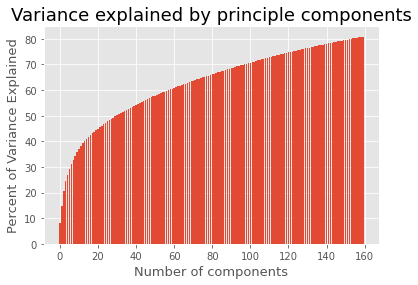

In [51]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " features explain around 75% of the variance. From 489 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train.pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp)
plt.xlabel("Number of components", fontsize = 13)
plt.ylabel("Percent of Variance Explained", fontsize = 13)
# fig.suptitle('test title', fontsize=20)

plt.title("Variance explained by principle components", fontsize=18)
# plt.set_ylabel('Patient Count');
# plt.savefig("PCA_component_variance.png", dpi=200)

In [ ]:
X_test.shape

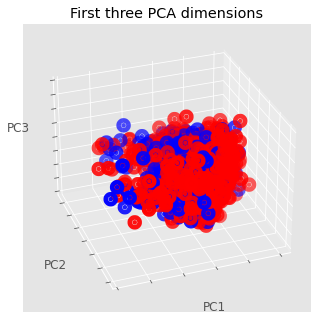

In [52]:
pca3 = PCA(n_components = 3).fit_transform(X_train)
colors = np.where(y_train==0, 'red', 'blue')
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(pca3[:, 0], pca3[:, 1], pca3[:, 2], c=colors, cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("PC1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC3")
ax.w_zaxis.set_ticklabels([])
# plt.savefig("PCA_first_3_plt.png", dpi=200)
plt.show()


In [ ]:
logistic_regression_grid2 = {'Cs':[2, 5]
                       ,'cv':[2,4,8]
                       ,'solver':['lbfgs', 'liblinear']
                       ,'max_iter' : [50]
                       ,'penalty':['l1', 'l2', 'elasticnet']
                           }

In [ ]:
logistic_randomsearch2 = RandomizedSearchCV(LogisticRegressionCV()
                                              ,logistic_regression_grid2
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

In [ ]:
# logRegRidge = LogisticRegressionCV(penalty='l2', max_iter=100)
# logRegRidge.fit(X_train2, y_train2)
# print(f'Ridge Coefficients:{logRegRidge.coef_}')
    
# logReg_pred_p = logRegRidge.predict_proba(X_test)
# y_pred = logRegRidge.predict(X_test)
    
# Lasso

log_Reg_Lasso = LogisticRegressionCV(max_iter=200)
log_Reg_Lasso.fit(X_train, y_train)
print(f'Lasso Coefficients:{log_Reg_Lasso.coef_}')
    
log_Reg_Lasso_pred_p = log_Reg_Lasso.predict_proba(X_test)
y_pred = log_Reg_Lasso.predict(X_test) 








# logistic_randomsearch2.fit(X_train2, y_train2)
# print(f"Best logistic Parameters: {logistic_randomsearch2.best_params_}")
# print(f"Best logistic Model: {logistic_randomsearch2.best_estimator_}")
# print(f"Best logistic Score: {logistic_randomsearch2.best_score_:.4f}")


# # logRegRidge = LogisticRegressionCV(penalty='l2', max_iter=200)
# # logRegRidge.fit(X_train, y_train)
# print(f'LogisticRegression Coefficients:{logistic_randomsearch2.coef_}')
    
# logReg_pred_p = logistic_randomsearch2.predict_proba(X_test)
# y_pred = logistic_randomsearch2.predict(X_test)
#_______________________________________________________________________    
# Lasso

# log_Reg_Lasso = LogisticRegressionCV(max_iter=200)
# log_Reg_Lasso.fit(X_train, y_train)
# print(f'Lasso Coefficients:{log_Reg_Lasso.coef_}')
    
# log_Reg_Lasso_pred_p = log_Reg_Lasso.predict_proba(X_test)
# y_pred = log_Reg_Lasso.predict(X_test) 

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
logistic_randomsearch2.fit(X_train, y_train)

logistic_best_model2 = logistic_randomsearch2.best_estimator_
logistic2_y_hats = logistic_best_model2.predict(X_test)
print(f"Gradient ROC Score = {roc_auc_score(y_test, logistic2_y_hats):.4f}")

In [ ]:
print(classification_report(y_test, logistic2_y_hats))

In [ ]:
# y.to_csv(r'capstone2/data/target_death_col.csv', index = False)

In [ ]:
!pwd


In [ ]:


ada_randomsearch.fit(X_train, y_train)
print(f"Best Random adaboost Parameters: {ada_randomsearch.best_params_}")
print(f"Best Random adaboost Model: {ada_randomsearch.best_estimator_}")
print(f"Best Random adaboost Score: {ada_randomsearch.best_score_:.4f}")

In [65]:
loaded_model = pickle.load(open('/Users/cp/Documents/dsi/capstone2/capstone2/models/gradient_best_model1.sav', 'rb'))
result = loaded_model.score(X_test, y_test)

In [66]:
print(result)

0.96875


In [67]:
y2_loaded = loaded_model.predict(X_test)

In [68]:
print(classification_report(y_test, y2_loaded))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       172
         1.0       1.00      0.90      0.95        84

    accuracy                           0.97       256
   macro avg       0.98      0.95      0.96       256
weighted avg       0.97      0.97      0.97       256



In [71]:
loaded_model.feature_importances_

array([4.21432860e-04, 3.18110767e-03, 4.43293548e-03, 7.57965237e-03,
       4.15880174e-04, 3.49477616e-03, 3.86099570e-04, 1.39507574e-03,
       2.80301869e-03, 5.60075498e-04, 1.30554772e-03, 1.58027107e-03,
       5.87873335e-03, 2.03739777e-03, 8.56255564e-04, 1.51945042e-03,
       2.57987088e-03, 3.41984541e-03, 1.24239310e-03, 2.63371586e-03,
       1.43502921e-03, 2.99351808e-03, 1.26359050e-03, 1.71539435e-04,
       1.16297407e-03, 2.37949685e-04, 2.41549325e-03, 9.97144287e-04,
       4.75907828e-04, 2.71767536e-05, 3.81225179e-03, 1.24185252e-03,
       1.07975345e-03, 1.71736667e-04, 4.10246116e-03, 1.13367434e-03,
       1.95075091e-03, 3.15009951e-06, 3.43374220e-04, 1.53546555e-03,
       5.60933027e-03, 1.17140535e-03, 1.84082363e-03, 2.15095834e-03,
       5.81867789e-03, 7.50391738e-03, 2.95691308e-04, 8.67586625e-04,
       1.59112588e-03, 3.57662005e-03, 9.80573444e-04, 4.58337595e-04,
       1.39838944e-02, 8.72372093e-03, 1.22464714e-03, 2.38660295e-03,
      

Feature ranking:
1. feature 120 (0.060101)
2. feature 376 (0.019487)
3. feature 52 (0.013984)
4. feature 174 (0.012359)
5. feature 224 (0.009974)
6. feature 487 (0.009789)
7. feature 379 (0.008975)
8. feature 53 (0.008724)
9. feature 3 (0.007580)
10. feature 204 (0.007552)
11. feature 45 (0.007504)
12. feature 348 (0.007274)
13. feature 210 (0.006914)
14. feature 443 (0.006914)
15. feature 78 (0.006695)
16. feature 64 (0.006342)
17. feature 346 (0.006186)
18. feature 237 (0.006024)
19. feature 176 (0.005918)
20. feature 12 (0.005879)
21. feature 265 (0.005839)
22. feature 44 (0.005819)
23. feature 413 (0.005817)
24. feature 121 (0.005797)
25. feature 197 (0.005776)
26. feature 435 (0.005774)
27. feature 209 (0.005764)
28. feature 40 (0.005609)
29. feature 145 (0.005609)
30. feature 350 (0.005497)
31. feature 168 (0.005470)
32. feature 281 (0.005423)
33. feature 317 (0.005409)
34. feature 480 (0.005376)
35. feature 271 (0.005325)
36. feature 239 (0.005120)
37. feature 260 (0.005043)
38.

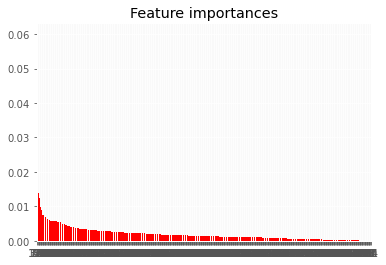

In [72]:
importances = loaded_model.feature_importances_
std = np.std([loaded_model.feature_importances_ for tree in random_forest_best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature listed in descending importance level", fontsize = 13)
plt.ylabel("Importance Value", fontsize = 13)
plt.savefig("gradient_boost_feature_importance.png", dpi=200)
plt.show()

Feature ranking:
1. feature 120 (0.085668)
2. feature 26 (0.084377)
3. feature 52 (0.079034)
4. feature 12 (0.022371)
5. feature 39 (0.016494)
6. feature 149 (0.016344)
7. feature 302 (0.016030)
8. feature 174 (0.013164)
9. feature 45 (0.011767)
10. feature 107 (0.011096)
11. feature 230 (0.010865)
12. feature 53 (0.010496)
13. feature 455 (0.009886)
14. feature 25 (0.009748)
15. feature 28 (0.009469)
16. feature 40 (0.008734)
17. feature 376 (0.008607)
18. feature 347 (0.008294)
19. feature 42 (0.007880)
20. feature 138 (0.007833)
21. feature 434 (0.007698)
22. feature 15 (0.007418)
23. feature 310 (0.007384)
24. feature 78 (0.007358)
25. feature 17 (0.007088)
26. feature 258 (0.006770)
27. feature 381 (0.006599)
28. feature 92 (0.006295)
29. feature 70 (0.006081)
30. feature 24 (0.006034)
31. feature 239 (0.005958)
32. feature 387 (0.005691)
33. feature 414 (0.005610)
34. feature 161 (0.005550)
35. feature 182 (0.005520)
36. feature 294 (0.005447)
37. feature 460 (0.005288)
38. featu

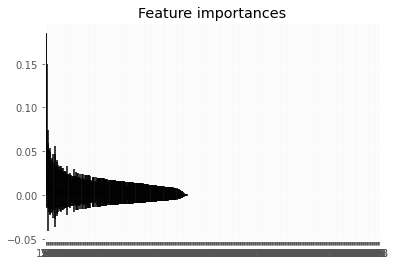

In [57]:
random_forest_best_model

importances = random_forest_best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest



Feature ranking:
1. feature 120 (0.085668)
2. feature 26 (0.084377)
3. feature 52 (0.079034)
4. feature 12 (0.022371)
5. feature 39 (0.016494)
6. feature 149 (0.016344)
7. feature 302 (0.016030)
8. feature 174 (0.013164)
9. feature 45 (0.011767)
10. feature 107 (0.011096)
11. feature 230 (0.010865)
12. feature 53 (0.010496)
13. feature 455 (0.009886)
14. feature 25 (0.009748)
15. feature 28 (0.009469)
16. feature 40 (0.008734)
17. feature 376 (0.008607)
18. feature 347 (0.008294)
19. feature 42 (0.007880)
20. feature 138 (0.007833)
21. feature 434 (0.007698)
22. feature 15 (0.007418)
23. feature 310 (0.007384)
24. feature 78 (0.007358)
25. feature 17 (0.007088)
26. feature 258 (0.006770)
27. feature 381 (0.006599)
28. feature 92 (0.006295)
29. feature 70 (0.006081)
30. feature 24 (0.006034)
31. feature 239 (0.005958)
32. feature 387 (0.005691)
33. feature 414 (0.005610)
34. feature 161 (0.005550)
35. feature 182 (0.005520)
36. feature 294 (0.005447)
37. feature 460 (0.005288)
38. featu

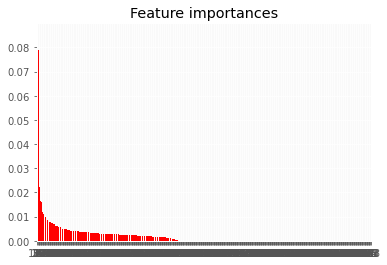

In [59]:
importances = random_forest_best_model.feature_importances_
std = np.std([random_forest_best_model.feature_importances_ for tree in random_forest_best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

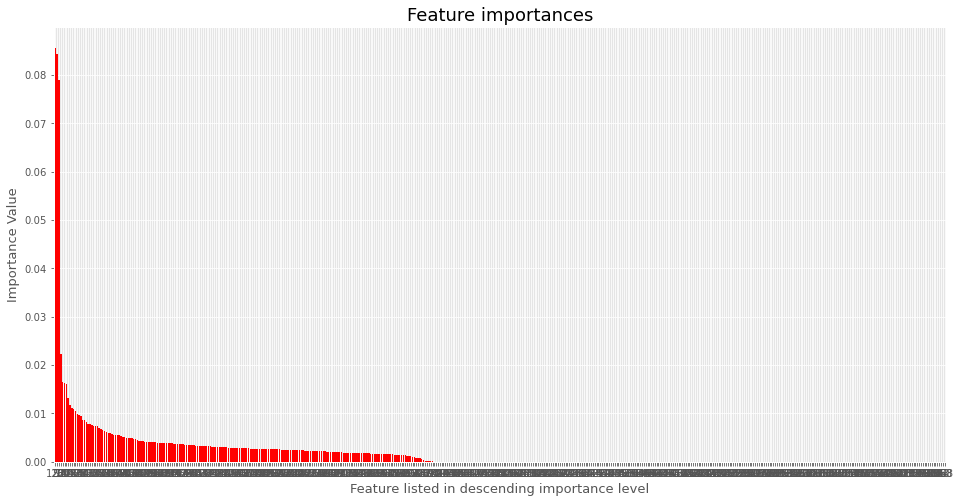

In [64]:
plt.figure(figsize = (16, 8))
plt.title("Feature importances", fontsize = 18)

plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature listed in descending importance level", fontsize = 13)
plt.ylabel("Importance Value", fontsize = 13)
plt.savefig("random_forest_feature_importance.png", dpi=200)
plt.show()

In [76]:
X_test.iloc[:,120]



1769    0.5995
1027    0.4971
1399   -0.7847
306    -1.0864
1858    0.1082
         ...  
1822    1.6898
12      0.0823
516    -0.8768
1490    0.0840
1192    0.1912
Name: aurka, Length: 256, dtype: float64